In [22]:
import pandas as  pd
from matplotlib import colors
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df=pd.read_csv('/home/ifte-home/Documents/mental_health/suicide/CSSRS/500_Reddit_users_posts_labels.csv')

In [10]:
from ipynb.fs.full.preprocess_dataset import generate_dataframe, process

In [87]:
df = generate_dataframe(20)
df = df.rename(columns={'Post': 'processed'})


In [51]:
df.Label.value_counts()

Ideation      195
Indicator     176
Supportive    108
Behavior       85
Attempt        52
Name: Label, dtype: int64

In [88]:
df['Token Frequency'] = df.processed.apply(lambda x: len(str(x).split()))

[Text(0.5, 1.0, 'Documents length Distribution (Reddit Dataset)')]

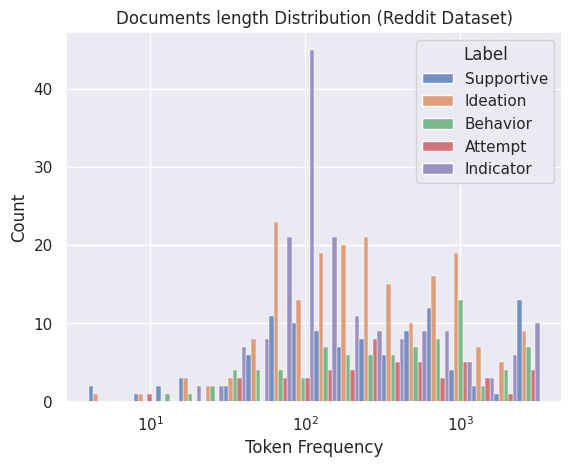

In [89]:
sns.set_style("darkgrid")
ax = sns.histplot(df, x="Token Frequency", hue="Label", log_scale=True, bins=20, multiple="dodge")
ax.set(title='Documents length Distribution (Reddit Dataset)')


In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('/home/ifte-home/Documents/mental_health/suicide/Suicide_Detection.csv')

In [5]:
df

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide
...,...,...,...
232069,348103,If you don't like rock then your not going to ...,non-suicide
232070,348106,You how you can tell i have so many friends an...,non-suicide
232071,348107,pee probably tastes like salty tea😏💦‼️ can som...,non-suicide
232072,348108,The usual stuff you find hereI'm not posting t...,suicide


In [93]:
df['Token Frequency'] = df.processed.apply(lambda x: len(str(x).split()))

[Text(0.5, 1.0, 'Documents length Distribution (Twitter Dataset)')]

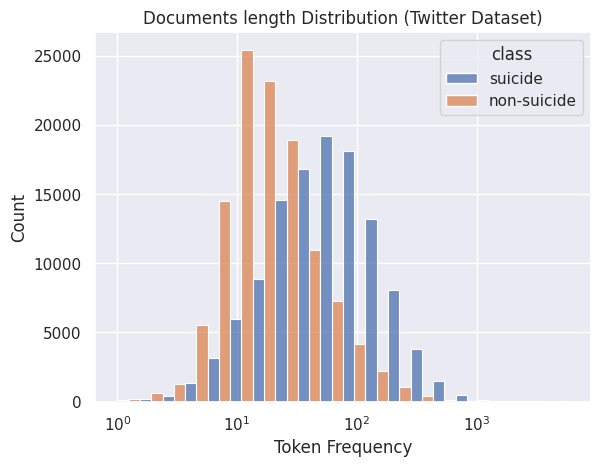

In [95]:
sns.set_style("darkgrid")
ax = sns.histplot(df, x="Token Frequency", hue="class", log_scale=True, bins=20, multiple="dodge")
ax.set(title='Documents length Distribution (Twitter Dataset)')


In [96]:
df = pd.read_csv('/home/ifte-home/Documents/mental_health/suicide/Suicide_Detection.csv')

In [6]:
df

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide
...,...,...,...
232069,348103,If you don't like rock then your not going to ...,non-suicide
232070,348106,You how you can tell i have so many friends an...,non-suicide
232071,348107,pee probably tastes like salty tea😏💦‼️ can som...,non-suicide
232072,348108,The usual stuff you find hereI'm not posting t...,suicide


In [7]:
df = df.rename(columns={'class': 'label'})

In [8]:
df['text'] = df.text.astype('str')

In [11]:
df['text'] = df.text.apply(lambda sample: process(sample))

In [132]:
data = {'Depression': [], 'Suicide': []}
ind = []
for i in range(0, 1600, 100):
    scatter_data_x = scatter_data[scatter_data['Processed'].map(len) > i]
    x = scatter_data_x.label.value_counts()
    data['Suicide'].append(x[0])
    data['Depression'].append(x[1])
    ind.append(i)

In [16]:
df.to_csv('/home/ifte-home/Documents/mental_health/suicide/Suicide_Detection_processed.csv')


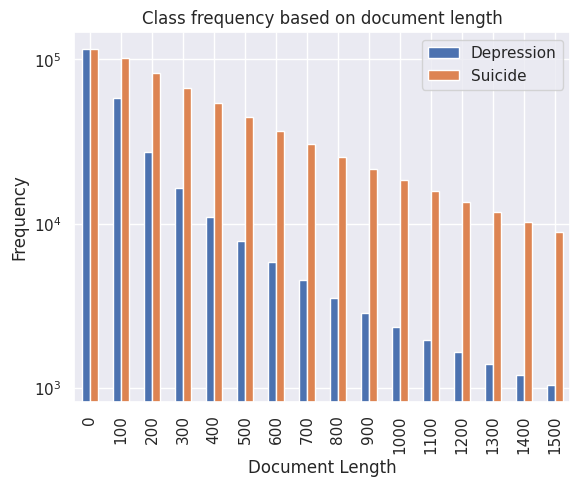

In [133]:
count = pd.DataFrame(data, index=ind)

count.plot(kind="bar", logy=True) 
plt.xlabel("Document Length")
plt.ylabel("Frequency")
plt.title("Class frequency based on document length")
plt.show()

In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('/home/ifte-home/Documents/mental_health/suicide/Suicide_Detection_processed.csv')


In [11]:
df['text'] = df.text.astype('str')

In [13]:
import re
def remove_characters(text):
    text = text.split()
    text = [x for x in text if len(x)>3]
    return ' '.join(text)

In [14]:
df['text'] = df.text.apply(lambda x: remove_characters(x))

### Gram analysis

In [15]:
import collections
import re
import sys
import time


def tokenize(string):
    """Convert string to lowercase and split into words (ignoring
    punctuation), returning list of words.
    """
    return re.findall(r'\w+', string.lower())


def count_ngrams(lines, min_length=1, max_length=4):
    """Iterate through given lines iterator (file object or list of
    lines) and return n-gram frequencies. The return value is a dict
    mapping the length of the n-gram to a collections.Counter
    object of n-gram tuple and number of times that n-gram occurred.
    Returned dict includes n-grams of length min_length to max_length.
    """
    lengths = range(min_length, max_length + 1)
    ngrams = {length: collections.Counter() for length in lengths}
    queue = collections.deque(maxlen=max_length)

    # Helper function to add n-grams at start of current queue to dict
    def add_queue():
        current = tuple(queue)
        for length in lengths:
            if len(current) >= length:
                ngrams[length][current[:length]] += 1

    # Loop through all lines and words and add n-grams to dict
    for line in lines:
        for word in tokenize(line):
            queue.append(word)
            if len(queue) >= max_length:
                add_queue()

    # Make sure we get the n-grams at the tail end of the queue
    while len(queue) > min_length:
        queue.popleft()
        add_queue()

    return ngrams


def print_most_frequent(ngrams, num=30):
    """Print num most common n-grams of each length in n-grams dict."""
    for n in sorted(ngrams):
        print('----- {} most common {}-grams -----'.format(num, n))
        for gram, count in ngrams[n].most_common(num):
            print('{0}: {1}'.format(' '.join(gram), count))
        print('')


In [16]:
suicide = df[df['label']=='suicide'].text.values
nonsuicide = df[df['label']=='non-suicide'].text.values 

In [17]:
def out(suicide, num):
    start_time = time.time()
    ngrams = count_ngrams(suicide)
    print_most_frequent(ngrams, num=num)
    elapsed_time = time.time() - start_time
    print('Took {:.03f} seconds'.format(elapsed_time))

In [18]:
out(suicide, 100)

----- 100 most common 1-grams -----
want: 136239
like: 133020
feel: 120178
life: 118699
know: 111954
time: 86107
even: 77229
year: 74887
people: 73523
friend: 70885
would: 70526
thing: 66529
really: 65168
think: 60440
going: 57409
never: 57008
make: 51114
much: 50909
help: 48975
thought: 43867
anymore: 42244
anything: 37986
could: 37914
family: 37874
everything: 37002
fucking: 36422
suicide: 36053
kill: 35746
nothing: 35652
back: 35404
better: 35244
someone: 35071
live: 34686
still: 34411
always: 34318
good: 34024
need: 32818
every: 32809
love: 32571
school: 32386
work: 31948
care: 31131
something: 30490
hate: 30459
feeling: 29865
talk: 29218
take: 28999
anyone: 28687
right: 28598
last: 28266
ever: 28248
everyone: 27004
keep: 26935
point: 26644
month: 26524
since: 26195
parent: 25999
tried: 25380
shit: 25371
person: 25154
told: 24449
tell: 24088
pain: 23106
long: 22921
happy: 22614
getting: 22610
reason: 22572
away: 22549
around: 22453
depression: 22280
suicidal: 21993
made: 21360
find

In [24]:
out(nonsuicide, 100)

----- 100 most common 1-grams -----
filler: 54627
like: 52110
know: 26124
want: 22780
people: 22317
friend: 21767
fuck: 21715
time: 19646
really: 18425
feel: 16588
think: 15408
would: 15320
make: 15024
school: 14999
thing: 14497
girl: 14403
year: 14223
even: 13930
good: 12934
need: 11977
something: 11343
someone: 11009
help: 10967
post: 10949
life: 10690
anyone: 10640
said: 10391
going: 10344
never: 10072
talk: 9789
much: 9630
also: 9598
fucking: 9401
http: 9241
shit: 9206
love: 8929
back: 8734
still: 8666
wanna: 8016
could: 7962
tell: 7883
first: 7881
gonna: 7774
right: 7691
anything: 7683
today: 7603
please: 7283
made: 6999
give: 6706
class: 6682
reddit: 6660
ever: 6595
everyone: 6532
game: 6518
person: 6466
take: 6447
hate: 6431
every: 6430
well: 6350
thought: 6327
look: 6296
cheese: 6244
parent: 6150
always: 5974
come: 5901
told: 5779
best: 5548
dont: 5512
last: 5493
since: 5384
mean: 5381
work: 5363
stuff: 5326
getting: 5285
started: 5262
pretty: 5151
play: 5133
hour: 5119
around:

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [25]:
df = pd.read_csv('/home/ifte-home/Documents/depression.csv')

In [26]:
df

,word,freq,Unnamed: 2,Unnamed: 3,bigram,bi_freq
0,like,133020.0,suicidal thought,6385,fuck fuck,12329.0
1,feel,120178.0,high school,6375,feel like,5831.0
2,think,60440.0,really want,5101,fuck jake,1944.0
3,going,57409.0,last year,5066,paul fuck,1942.0
4,never,57008.0,even know,4852,anyone else,1877.0
...,...,...,...,...,...,...
80,NaN,NaN,would never,1868,NaN,NaN
81,NaN,NaN,live life,1866,NaN,NaN
82,NaN,NaN,make sense,1854,NaN,NaN
83,NaN,NaN,getting better,1841,NaN,NaN


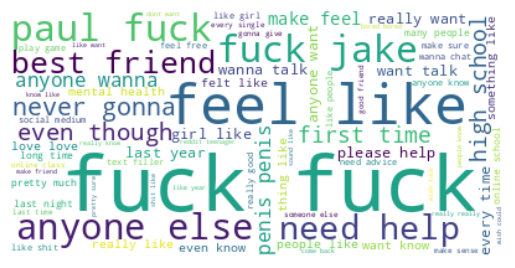

In [28]:
def generate_word_cloud(frame, m):
    d = {}
    frame = frame.dropna()
    for a, x in frame.values:
        d[a] = x

    wordcloud = WordCloud(background_color="white", max_words=m)
    wordcloud.generate_from_frequencies(frequencies=d)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

generate_word_cloud(df[['bigram', 'bi_freq']], 80)